In [18]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

#print statement
print("Libraries imported successfully!") 

Libraries imported successfully!


In [19]:
# Load and explore the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data = pd.read_csv(url)

# Print statement
print("Dataset loaded successfully!")


Dataset loaded successfully!


In [20]:
#Check for missing values
missing_values = data.isnull().sum()

#print statement
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [22]:
#Select features for clustering and scale them
features = data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Features selected and scaled for clustering.")
print(scaled_features[:5])

Features selected and scaled for clustering.
[[ 0.05293319  0.52356777 -0.04111489 -0.58936716 -0.04356873 -0.06633906]
 [-0.39130197  0.54445767  0.17031835 -0.27013618  0.08640684  0.08915105]
 [-0.44702926  0.40853771 -0.0281571  -0.13753572  0.13323164  2.24329255]
 [ 0.10011141 -0.62401993 -0.3929769   0.6871443  -0.49858822  0.09341105]
 [ 0.84023948 -0.05239645 -0.07935618  0.17385884 -0.23191782  1.29934689]]


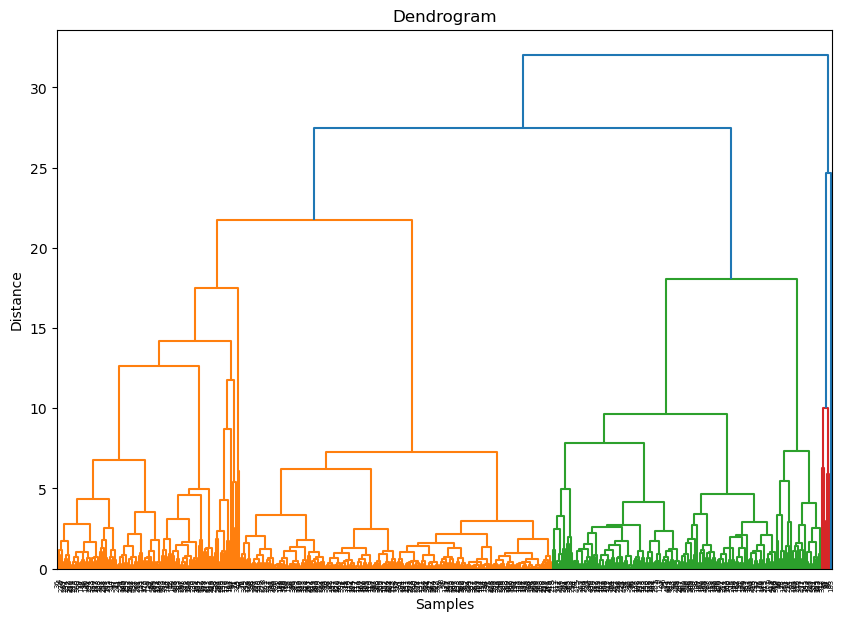

Dendrogram plotted to determine the optimal number of clusters.


In [23]:
#Determine the optimal number of clusters using a dendrogram
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

print('Dendrogram plotted to determine the optimal number of clusters.')

In [24]:
#Apply agglomerative clustering with the optimal number of clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(scaled_features)

data['Cluster'] = clusters

print("Agglomerative Clustering applied and cluster labels added to the dataset.")
data.head()

Agglomerative Clustering applied and cluster labels added to the dataset.


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,1


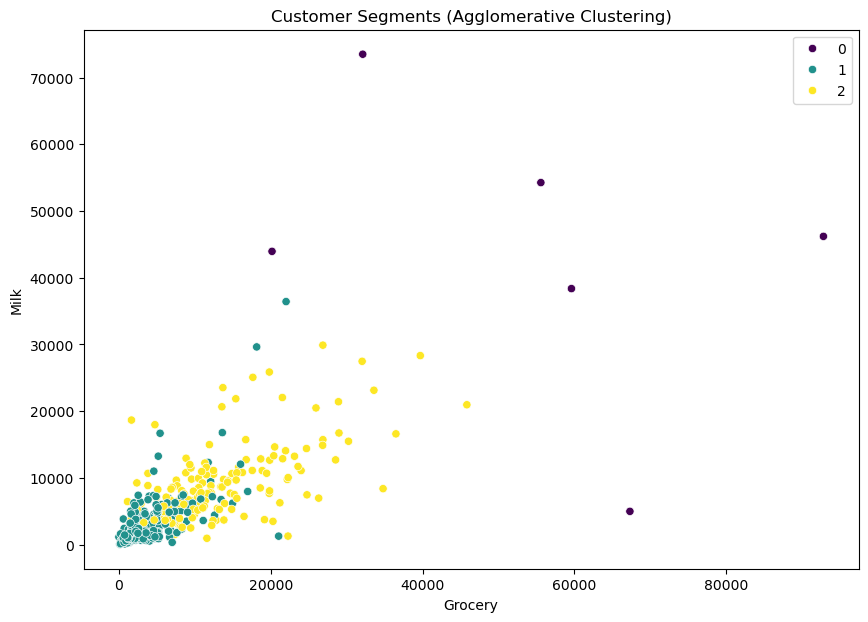

Clusters Visualized.


In [25]:
#Visualize the clusters 
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Grocery', y='Milk', hue='Cluster',palette='viridis', data=data)
plt.title('Customer Segments (Agglomerative Clustering)')
plt.legend()
plt.show()

print("Clusters Visualized.")